## 서울시 서대문구에서 치킨집이 가장 많은 동은?

### 자료 출처
- 데이터 다운로드 : LOCALDATA 웹 사이트 
- http://www.localdata.kr/
- 지방자치단체에서 인/허가한 업종별 데이터 제공
- 문화, 체육, 관광, 식품 등 11가지 분야에 걸쳐 다양한 데이터 검색 가능
- 회원 가입 절차를 별도로 거치지 않고도 공공데이터 다운로드 할 수 있음

In [1]:
# 필요 모듈 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #그래프 패키지 모듈 등록
%matplotlib inline 


In [2]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

- UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 1: invalid start byte
- 한글처리 방식 (cp949)
- DtypeWarning: Columns (22,27,39,41,44,45) have mixed types. Specify dtype option on import or set low_memory=False.

In [3]:
# 데이터 읽어오기
data = pd.read_csv('./data/서울특별시_일반음식점.csv',encoding='cp949',low_memory=False)

In [4]:
data.head(2)
data.tail(2)

,번호,개방서비스명,개방서비스아이디,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태구분코드,영업상태명,상세영업상태코드,...,공장생산직종업원수,건물소유구분명,보증액,월세액,다중이용업소여부,시설총규모,전통업소지정번호,전통업소주된음식,홈페이지,Unnamed: 47
472913,472914,일반음식점,07_24_04_P,3150000,3150000-101-2021-00072,20210203,NaN,3,폐업,2,...,0.0,NaN,0.0,0,N,75.60,NaN,NaN,NaN,NaN
472914,472915,일반음식점,07_24_04_P,3130000,3130000-101-2020-01013,20201208,NaN,3,폐업,2,...,0.0,NaN,0.0,0,N,22.75,NaN,NaN,NaN,NaN


In [5]:
# 데이터 개요 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472915 entries, 0 to 472914
Data columns (total 48 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   번호           472915 non-null  int64  
 1   개방서비스명       472915 non-null  object 
 2   개방서비스아이디     472915 non-null  object 
 3   개방자치단체코드     472915 non-null  int64  
 4   관리번호         472915 non-null  object 
 5   인허가일자        472915 non-null  int64  
 6   인허가취소일자      0 non-null       float64
 7   영업상태구분코드     472915 non-null  int64  
 8   영업상태명        472915 non-null  object 
 9   상세영업상태코드     472915 non-null  int64  
 10  상세영업상태명      472915 non-null  object 
 11  폐업일자         348707 non-null  float64
 12  휴업시작일자       0 non-null       float64
 13  휴업종료일자       0 non-null       float64
 14  재개업일자        0 non-null       float64
 15  소재지전화        327325 non-null  object 
 16  소재지면적        439015 non-null  object 
 17  소재지우편번호      472670 non-null  float64
 18  소재지전체주소      472678 non-

### 통닭/치킨 데이터만 추출
- 업태를 확인
    - 업태 구분명, 위생 업태명

In [6]:
data['업태구분명']
data['업태구분명'].unique()

array(['한식', '일식', '분식', '기타', '출장조리', '식육(숯불구이)', '중국식', '경양식', '호프/통닭',
       '까페', '정종/대포집/소주방', '뷔페식', '김밥(도시락)', '통닭(치킨)', '횟집', '패밀리레스트랑',
       '감성주점', '외국음식전문점(인도,태국등)', '라이브카페', '복어취급', '키즈카페', '패스트푸드',
       '탕류(보신용)', '냉면집', '커피숍', nan, '전통찻집', '이동조리', '룸살롱', '식품등 수입판매업',
       '간이주점', '다방', '일반조리판매', '기타 휴게음식점', '제과점영업', '식품소분업',
       '193959.150482967'], dtype=object)

In [7]:
data['위생업태명']
data['위생업태명'].unique()

array(['한식', '일식', '분식', '기타', '출장조리', '식육(숯불구이)', '중국식', '경양식', '호프/통닭',
       '까페', '정종/대포집/소주방', '뷔페식', '김밥(도시락)', '통닭(치킨)', '횟집', '패밀리레스트랑',
       '감성주점', '외국음식전문점(인도,태국등)', '라이브카페', '복어취급', '키즈카페', '패스트푸드',
       '탕류(보신용)', '냉면집', '커피숍', nan, '전통찻집', '이동조리', '룸살롱', '식품등 수입판매업',
       '간이주점', '다방', '일반조리판매', '기타 휴게음식점', '제과점영업', '식품소분업'], dtype=object)

- 업태구분명/위생업태명 모두 가능 : 위생업태명으로 확인
    - 통닭이나 치킨이 들어있는 업태명을 선택

In [8]:
# contains(문자열) 함수 사용
# 문자열.contains(문자열1) - 문자열안에 문자열1이 포함되어 있는지의 여부
# 문자열이 아닌  nan에 대입하면 에러발생할 수 있으므로 na=False 파라미터 설정해야 함
data.위생업태명.str.contains('통닭|치킨',na=False)

0         False
1         False
2         False
3         False
4         False
          ...  
472910    False
472911    False
472912    False
472913    False
472914    False
Name: 위생업태명, Length: 472915, dtype: bool

In [9]:
data.위생업태명[4]

'일식'

In [10]:
# 필요한 컬럼만 추출 후 set()이용 확인
set(data.위생업태명[data.위생업태명.str.contains('통닭|치킨', na = False)])


{'통닭(치킨)', '호프/통닭'}

In [11]:
# 현재 영업중인 경우 영업상태명 확인
set(data.영업상태명)

{'영업/정상', '폐업'}

In [ ]:
# 영업상태명이 영업/정상 이고 위생업태명이 {'통닭(치킨)' 이거나 '호프/통닭'} 인
# data를 추출 (조건 인덱싱)

In [12]:
# 시리즈 함수 .isin([데이터1,데이터2])
# 시리즈 원소가 []안의 데이터 1개와 일치하면 True

(data.영업상태명 == '영업/정상') & data.위생업태명.isin(['호프/통닭', '통닭(치킨)'])

0         False
1         False
2         False
3         False
4         False
          ...  
472910    False
472911    False
472912    False
472913    False
472914    False
Length: 472915, dtype: bool

In [22]:
data_fin = data[(data.영업상태명 == '영업/정상') & data.위생업태명.isin(['호프/통닭', '통닭(치킨)'])]

In [23]:
data_fin.head()
data_fin.tail()

,번호,개방서비스명,개방서비스아이디,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태구분코드,영업상태명,상세영업상태코드,...,공장생산직종업원수,건물소유구분명,보증액,월세액,다중이용업소여부,시설총규모,전통업소지정번호,전통업소주된음식,홈페이지,Unnamed: 47
124130,124131,일반음식점,07_24_04_P,3120000,3120000-101-2021-00031,20210122,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,49.34,NaN,NaN,NaN,NaN
124151,124152,일반음식점,07_24_04_P,3160000,3160000-101-2020-00384,20201208,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,33.00,NaN,NaN,NaN,NaN
124171,124172,일반음식점,07_24_04_P,3200000,3200000-101-2020-00626,20201209,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,62.80,NaN,NaN,NaN,NaN
124193,124194,일반음식점,07_24_04_P,3060000,3060000-101-2021-00028,20210203,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,53.84,NaN,NaN,NaN,NaN
124203,124204,일반음식점,07_24_04_P,3080000,3080000-101-2021-00015,20210122,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,40.00,NaN,NaN,NaN,NaN


In [24]:
# 위생업태명 확인
data_fin.위생업태명.head()
set(data_fin.위생업태명)

{'통닭(치킨)', '호프/통닭'}

In [25]:
data_fin.영업상태명.head()
set(data_fin.영업상태명)

{'영업/정상'}

In [27]:
# data_fin 확인
set(data_fin.영업상태명)
data_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13110 entries, 30 to 124203
Data columns (total 48 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   번호           13110 non-null  int64  
 1   개방서비스명       13110 non-null  object 
 2   개방서비스아이디     13110 non-null  object 
 3   개방자치단체코드     13110 non-null  int64  
 4   관리번호         13110 non-null  object 
 5   인허가일자        13110 non-null  int64  
 6   인허가취소일자      0 non-null      float64
 7   영업상태구분코드     13110 non-null  int64  
 8   영업상태명        13110 non-null  object 
 9   상세영업상태코드     13110 non-null  int64  
 10  상세영업상태명      13110 non-null  object 
 11  폐업일자         0 non-null      float64
 12  휴업시작일자       0 non-null      float64
 13  휴업종료일자       0 non-null      float64
 14  재개업일자        0 non-null      float64
 15  소재지전화        6536 non-null   object 
 16  소재지면적        12677 non-null  object 
 17  소재지우편번호      13103 non-null  float64
 18  소재지전체주소      13103 non-null  object 
 19  도로

In [28]:
# 서대문구 데이터만 추출
# 서대문구 각 동에 치킨집이 몇개나 있나?
# 필요 컬럼(소재지전체주소,위생업태명)
data_fin = data_fin[['소재지전체주소','위생업태명']]
data_fin.head()
# data_fin df는 서울시 치킨집 주소 데이터

,소재지전체주소,위생업태명
30,서울특별시 은평구 갈현동 400-9번지 (지하1층),호프/통닭
43,서울특별시 영등포구 양평동3가 101번지 현대아파트 상가내 1층 102호,호프/통닭
44,서울특별시 중구 필동2가 32-24번지 1층,호프/통닭
66,서울특별시 종로구 당주동 128-17번지 (지상1층),호프/통닭
67,서울특별시 서초구 우면동 59번지 105호,호프/통닭


In [29]:
# 서대문구 데이터만 추출
# 주소에 서대문구가 포함된 행만 추출
res = data_fin.소재지전체주소.str.contains('서대문구',na=False)

In [30]:
# 서대문구 치킨집 주소df
data_seo = data_fin[res]
data_seo.head()
data_seo.tail()


,소재지전체주소,위생업태명
122500,서울특별시 서대문구 남가좌동 389 DMC에코자이,호프/통닭
123490,서울특별시 서대문구 홍제동 307-5,호프/통닭
123548,서울특별시 서대문구 홍제동 96-5,호프/통닭
123724,서울특별시 서대문구 북아현동 1011 신촌푸르지오,호프/통닭
124130,서울특별시 서대문구 남가좌동 382-9,호프/통닭


In [32]:
# 소재지전체주소 열에서 XXX동만 남기고 이후 상세 주소는 삭제
# 모든 데이터가 서대문구 이므로 동데이터만 남김
# 일부 글자만 추출하는 str.slice() 함수 사용
# '서울특별시 서대문구 ' 다음 글자에서 'xxx동'까지 추출
# 11번째 글자에서 16번째 글자까지 추출
addr = data_seo.소재지전체주소.str.slice(start=11, stop=17)
addr


178       창천동 33
698       홍제동 45
724       남가좌동 3
1200      연희동 13
1405      창천동 52
           ...  
122500    남가좌동 3
123490    홍제동 30
123548    홍제동 96
123724    북아현동 1
124130    남가좌동 3
Name: 소재지전체주소, Length: 400, dtype: object

In [33]:
# 동 뒤에 나온 숫자 제거 - str.replace(제거할 문자, 대체 문자)
# '[0-9]' : 정규식 숫자를 의미
addr = addr.str.replace('[0-9]','')
addr

C:\Users\82102\AppData\Local\Temp\ipykernel_17936\87792211.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  addr = addr.str.replace('[0-9]','')


178        창천동 
698        홍제동 
724       남가좌동 
1200       연희동 
1405       창천동 
          ...  
122500    남가좌동 
123490     홍제동 
123548     홍제동 
123724    북아현동 
124130    남가좌동 
Name: 소재지전체주소, Length: 400, dtype: object

In [34]:
# 동 뒤에 나온 공백 제거
addr = addr.str.replace(' ','')
addr

178        창천동
698        홍제동
724       남가좌동
1200       연희동
1405       창천동
          ... 
122500    남가좌동
123490     홍제동
123548     홍제동
123724    북아현동
124130    남가좌동
Name: 소재지전체주소, Length: 400, dtype: object

In [35]:
# 동별 치킨집 개수(동 뒤에-가 있음 : 제거)
# 시리즈 데이터이므로 value_counts() 함수로 빈도를 확인
addr.value_counts()
addr = addr.str.replace('-','')
addr
addr.value_counts()

창천동     91
북가좌동    48
홍제동     48
남가좌동    47
홍은동     43
연희동     41
충정로가    21
북아현동    20
대현동     15
냉천동     10
미근동      6
영천동      2
합동       2
천연동      2
옥천동      2
대신동      1
옥천동번     1
Name: 소재지전체주소, dtype: int64

In [36]:
addr = addr.str.replace('옥천동번','옥천동')
addr.value_counts()

창천동     91
홍제동     48
북가좌동    48
남가좌동    47
홍은동     43
연희동     41
충정로가    21
북아현동    20
대현동     15
냉천동     10
미근동      6
옥천동      3
영천동      2
합동       2
천연동      2
대신동      1
Name: 소재지전체주소, dtype: int64

In [37]:
ck_cnt = addr.value_counts()
ck_cnt

창천동     91
홍제동     48
북가좌동    48
남가좌동    47
홍은동     43
연희동     41
충정로가    21
북아현동    20
대현동     15
냉천동     10
미근동      6
옥천동      3
영천동      2
합동       2
천연동      2
대신동      1
Name: 소재지전체주소, dtype: int64

In [38]:
# 트리맵시각화
import squarify

In [39]:
%pip install squarify

Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:>

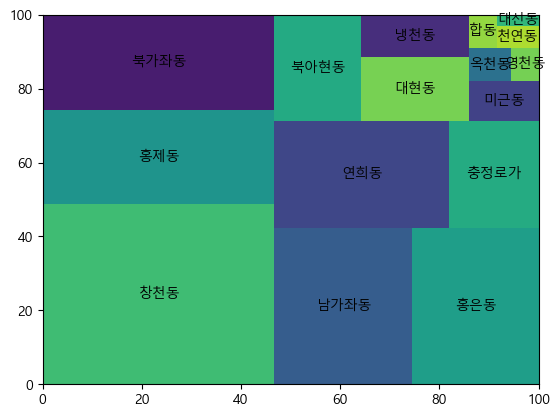

In [40]:
# squarity.plot(그래프적용데이터, label=그래프위에 표현할 text)
ck_cnt.index
squarify.plot(ck_cnt, label=ck_cnt.index)